<a href="https://colab.research.google.com/github/PUNNYA-P-GAUR/Machine-Learning/blob/main/SME_DATAMINING_SVM_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [3]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [4]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [5]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.svm import SVR

In [8]:
svr = SVR(kernel = 'linear',C = 1000)

In [9]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std


array([[ 0.17453157, -0.7473421 , -0.70428107, -1.4995245 , -1.05619832,
        -0.67877552, -1.30249126, -0.87278899, -1.15396095, -0.47648372,
        -0.09140157, -0.90774727,  0.59090608,  2.00340082,  1.79022864,
        -1.50033307, -0.29738086,  0.29738086],
       [-1.42118568, -1.74885637,  0.63398001,  0.14076744,  0.30739662,
         0.50614488, -0.1142863 , -0.38613195, -0.24348674,  0.32881569,
         3.4734668 , -0.82496629, -1.30634872,  0.73955013,  0.31375141,
        -0.82735207,  3.36269123, -3.36269123],
       [-0.62332705, -0.01896807,  2.63290164,  2.08080815,  1.2007864 ,
         2.05879919,  1.74841125,  0.63584784,  1.38777956,  0.89923611,
         3.05894722, -0.2179058 , -2.04417004, -0.05035655, -0.86743037,
        -0.18802012,  3.36269123, -3.36269123],
       [-0.62332705,  0.16312543,  0.29517974,  0.64867509,  0.30739662,
         0.58786352,  1.09156527,  1.34150055,  0.36349607,  0.06038255,
        -0.2572094 ,  1.35493275,  0.16929391, -1.314

In [10]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

In [11]:
y_test_pred

array([ 5957.14966842, 14468.92070095, 20448.68298715, 21478.92571603,
       20124.68107731,  9079.70352739, 15827.33391626,  6005.66841863,
       16069.42347072,  7254.92359917,  9776.48212662, 20670.10877046,
       12433.67581456, 11143.00652033, 13539.9142024 , 19226.71716277,
        6548.30452181, 20166.24495046,  8818.8454487 ,  6470.62142339,
       12170.16325257, 10461.81392719, 30525.17977575,  6766.09198268,
       13432.63305394, 20616.74081099,  8883.9869784 ,  8581.12259715,
       14982.54291298, 30430.16956057, 28911.77849742, 13980.97058004,
        7824.82285653, 20515.39293649,  8003.99866007, 11357.89548277,
       13718.79721617, 16467.89155357,  9304.60919156, 18705.27852977,
        6421.02399024])

In [12]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8510467833352227

In [13]:
r2_score(y_test,y_test_pred)

0.7207836625219506

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


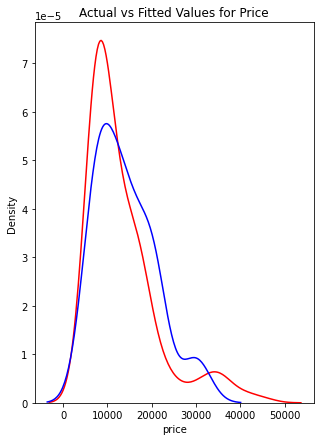

In [14]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()